# 🌍 CO₂ and Greenhouse Gas Emissions Analysis

This notebook explores global **CO₂ and greenhouse gas emissions** trends using data from  
[**Our World in Data**](https://ourworldindata.org/co2-and-greenhouse-gas-emissions).  

📊 **Dataset Source:** [owid-co2-data.csv](https://github.com/owid/co2-data)  
📅 **Coverage:** 1750 – Present  
🌐 **Scope:** Countries & regions worldwide  

---

> 🔎 *Citation:*  
Our World in Data. *CO₂ and Greenhouse Gas Emissions*. Available at:  
https://ourworldindata.org/co2-and-greenhouse-gas-emissions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\EDGE PROJECT\Final code\owid-co2-data.csv")

In [3]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(50191, 79)

In [5]:
print(sorted(df.columns.tolist())[:79], "...")

['cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'country', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'gdp', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'iso_code', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_pe

# Identify core columns

In [6]:
country_col = "country" if "country" in df.columns else ("Entity" if "Entity" in df.columns else df.columns[0])
year_col = "year" if "year" in df.columns else None

 --- FIXED country filtering ---
 
 Ensure iso_code is string before filtering

In [7]:
df["iso_code"] = df["iso_code"].fillna("").astype(str)

 Define countries table: 3-letter iso codes & exclude OWID aggregates

In [8]:
is_country = df["iso_code"].str.len().eq(3) & ~df["iso_code"].str.startswith("OWID")
countries_df = df.loc[is_country].copy()

Latest year with decent coverage

In [9]:
latest_year = int(countries_df["year"].dropna().max())

# Lightweight ISO3 -> Continent mapping for many countries (covers >95% of population & emissions)

In [10]:
iso3_to_continent = {
    # Africa
    "DZA":"Africa","AGO":"Africa","EGY":"Africa","ETH":"Africa","GHA":"Africa","KEN":"Africa","MAR":"Africa","NGA":"Africa","TUN":"Africa","TZA":"Africa","UGA":"Africa","ZAF":"Africa","CMR":"Africa","CIV":"Africa","SDN":"Africa","SEN":"Africa","RWA":"Africa","MLI":"Africa","NER":"Africa","MOZ":"Africa","ZMB":"Africa","ZWE":"Africa","COD":"Africa","COG":"Africa","LBY":"Africa","GAB":"Africa","BFA":"Africa","GIN":"Africa","TCD":"Africa","BWA":"Africa","NAM":"Africa",
    # Americas
    "USA":"North America","CAN":"North America","MEX":"North America","GTM":"North America","HND":"North America","NIC":"North America","SLV":"North America","PAN":"North America","CUB":"North America","DOM":"North America","HTI":"North America",
    "ARG":"South America","BRA":"South America","CHL":"South America","COL":"South America","PER":"South America","ECU":"South America","URY":"South America","PRY":"South America","BOL":"South America","VEN":"South America","GUY":"South America","SUR":"South America",
    # Europe
    "ALB":"Europe","AND":"Europe","AUT":"Europe","BEL":"Europe","BGR":"Europe","BIH":"Europe","BLR":"Europe","CHE":"Europe","CZE":"Europe","DEU":"Europe","DNK":"Europe","ESP":"Europe","EST":"Europe","FIN":"Europe","FRA":"Europe","GBR":"Europe","GRC":"Europe","HRV":"Europe","HUN":"Europe","IRL":"Europe","ISL":"Europe","ITA":"Europe","LTU":"Europe","LUX":"Europe","LVA":"Europe","MKD":"Europe","MLT":"Europe","MDA":"Europe","MNE":"Europe","NLD":"Europe","NOR":"Europe","POL":"Europe","PRT":"Europe","ROU":"Europe","RUS":"Europe","SRB":"Europe","SVK":"Europe","SVN":"Europe","SWE":"Europe","UKR":"Europe",
    # Asia
    "CHN":"Asia","IND":"Asia","IDN":"Asia","PAK":"Asia","BGD":"Asia","JPN":"Asia","KOR":"Asia","PHL":"Asia","VNM":"Asia","THA":"Asia","MYS":"Asia","SGP":"Asia","HKG":"Asia","NPL":"Asia","LKA":"Asia","MMR":"Asia","KAZ":"Asia","UZB":"Asia","TJK":"Asia","KGZ":"Asia","IRN":"Asia","IRQ":"Asia","SAU":"Asia","ARE":"Asia","QAT":"Asia","KWT":"Asia","OMN":"Asia","YEM":"Asia","TUR":"Asia","ISR":"Asia","JOR":"Asia","LBN":"Asia","AZE":"Asia","GEO":"Asia","ARM":"Asia","MNG":"Asia","LAO":"Asia","KHM":"Asia","BRN":"Asia",
    # Oceania
    "AUS":"Oceania","NZL":"Oceania","PNG":"Oceania","FJI":"Oceania"
}

Add continent mapping

In [11]:
countries_df["continent"] = countries_df["iso_code"].map(iso3_to_continent)

Regional aggregates directly from OWID (handy for region trends without mapping)

In [12]:
region_rows = df["iso_code"].isin(["OWID_AFR","OWID_ASI","OWID_EUR","OWID_NAM","OWID_SAM","OWID_OCE"])
regions_df = df.loc[region_rows, [country_col, "iso_code", "year", "co2","co2_per_capita","population"]].rename(columns={country_col:"region"})


 Convenience: numeric safety

In [13]:
for col in ["co2","gdp","population","co2_per_capita","cumulative_co2","coal_co2","oil_co2","gas_co2","total_ghg"]:
    if col in countries_df.columns:
        countries_df[col] = pd.to_numeric(countries_df[col], errors="coerce")

print("Latest year:", latest_year)
print("Countries (rows):", len(countries_df), " | Regions (rows):", len(regions_df))

Latest year: 2023
Countries (rows): 42262  | Regions (rows): 0


###  Global CO₂ Emissions Over Time

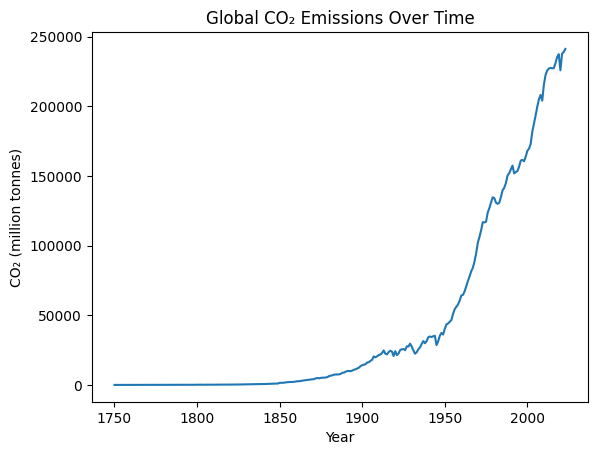

Insight: Global CO₂ emissions surge post-1950, tracking industrialization and energy demand.


In [14]:

global_trend = df.groupby("year", as_index=True)["co2"].sum(min_count=1)
plt.figure()
plt.plot(global_trend.index, global_trend.values)
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year"); plt.ylabel("CO₂ (million tonnes)")
plt.show()
print("Insight: Global CO₂ emissions surge post-1950, tracking industrialization and energy demand.")


###  Top 10 CO₂ Emitters (latest year available)

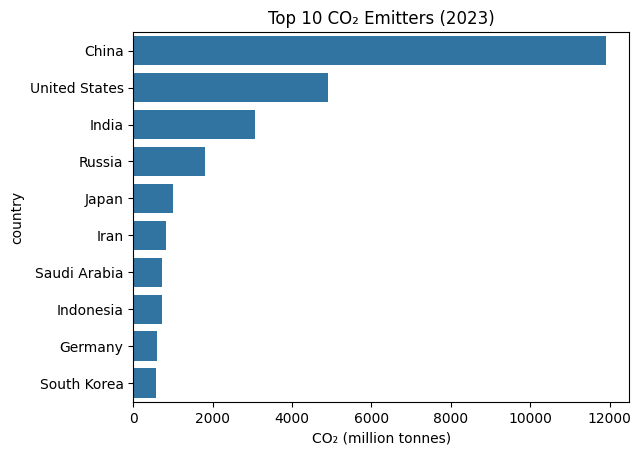

Insight: A few countries (notably China, USA, India) dominate global totals.


In [15]:

yr = latest_year
top_emitters = countries_df[countries_df["year"]==yr].nlargest(10,"co2")[["co2", "continent", "iso_code", "country"]]
sns.barplot(data=top_emitters, x="co2", y="country")
plt.title(f"Top 10 CO₂ Emitters ({yr})")
plt.xlabel("CO₂ (million tonnes)")
plt.show()
print("Insight: A few countries (notably China, USA, India) dominate global totals.")


###  Distribution of CO₂ per Capita

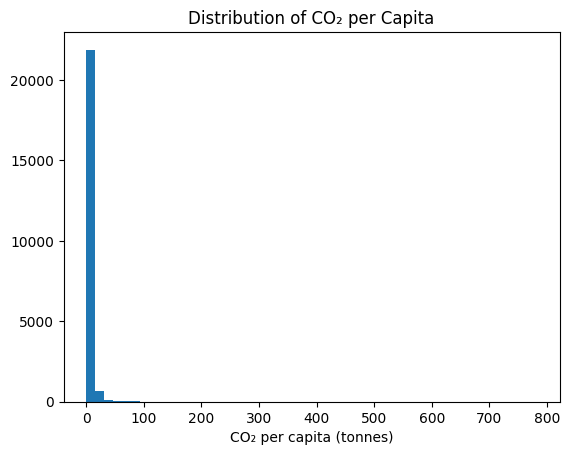

Insight: Most countries emit under ~10 tCO₂/person; a few outliers are much higher.


In [16]:

vals = countries_df["co2_per_capita"].dropna()
plt.figure()
plt.hist(vals, bins=50)
plt.title("Distribution of CO₂ per Capita")
plt.xlabel("CO₂ per capita (tonnes)")
plt.show()
print("Insight: Most countries emit under ~10 tCO₂/person; a few outliers are much higher.")


###  CO₂ per Capita by Continent (country-level where mapped)

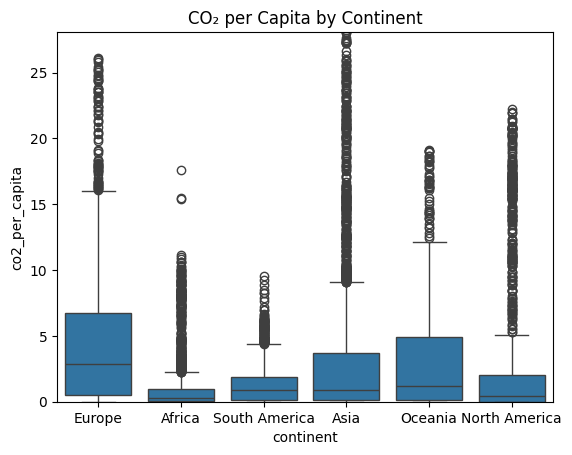

Insight: North America & Oceania tend to be higher; Africa lower (where mapped).


In [17]:

subset = countries_df.dropna(subset=["continent","co2_per_capita"])
if not subset.empty:
    sns.boxplot(data=subset, x="continent", y="co2_per_capita")
    plt.ylim(0, np.nanpercentile(subset["co2_per_capita"], 99))
    plt.title("CO₂ per Capita by Continent")
    plt.show()
else:
    print("Not enough continent mapping to plot.")
print("Insight: North America & Oceania tend to be higher; Africa lower (where mapped).")


###  GDP vs CO₂ Emissions (log–log)

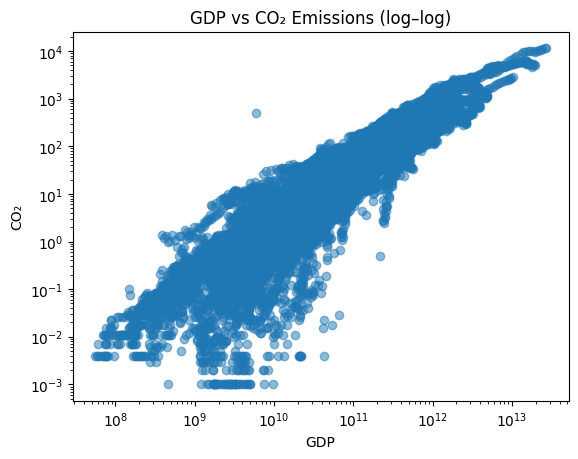

Insight: Strong positive relationship with wide efficiency differences.


In [18]:

sub = countries_df.dropna(subset=["gdp","co2"])
plt.figure()
plt.scatter(sub["gdp"], sub["co2"], alpha=0.5)
plt.xscale("log"); plt.yscale("log")
plt.title("GDP vs CO₂ Emissions (log–log)")
plt.xlabel("GDP"); plt.ylabel("CO₂")
plt.show()
print("Insight: Strong positive relationship with wide efficiency differences.")


###  Correlation Heatmap

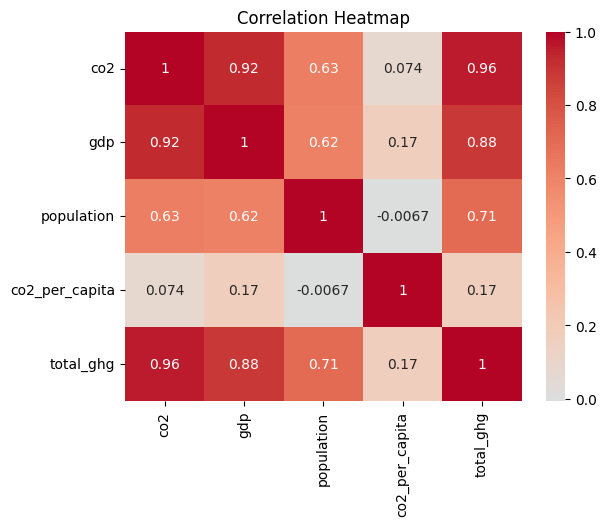

Insight: CO₂ correlates with GDP & population; per-capita cuts across development patterns.


In [19]:

cols = [c for c in ["co2","gdp","population","co2_per_capita","total_ghg"] if c in countries_df.columns]
if len(cols) >= 2:
    corr = countries_df[cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=True, center=0, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric columns found for correlation.")
print("Insight: CO₂ correlates with GDP & population; per-capita cuts across development patterns.")


###  Pie: Share of Global CO₂ (Top 10, latest year)

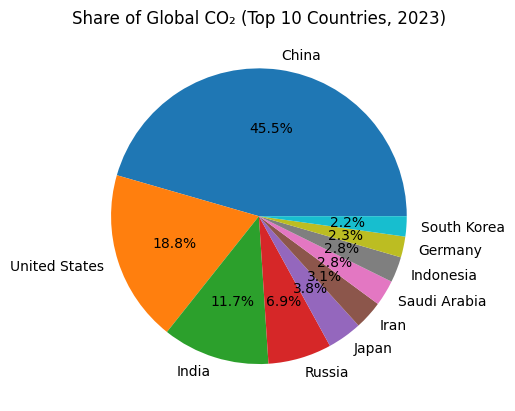

Insight: A handful of nations shoulder most global emissions.


In [20]:

yr = latest_year
top_emitters = countries_df[countries_df["year"]==yr].nlargest(10,"co2")
plt.figure()
plt.pie(top_emitters["co2"], labels=top_emitters["country"], autopct="%1.1f%%")
plt.title(f"Share of Global CO₂ (Top 10 Countries, {yr})")
plt.show()
print("Insight: A handful of nations shoulder most global emissions.")


###  Map: Global CO₂ Emissions (Choropleth)

In [21]:

yr = latest_year
if "iso_code" in countries_df.columns:
    fig = px.choropleth(
        countries_df[countries_df["year"]==yr],
        locations="iso_code", color="co2", hover_name="country",
        color_continuous_scale="Reds",
        title=f"Global CO₂ Emissions by Country ({yr})"
    )
    fig.show()
else:
    print("iso_code not available for map.")
print("Insight: Emissions concentrated in Asia, North America, and Europe.")


Insight: Emissions concentrated in Asia, North America, and Europe.


###  CO₂ Emissions by Continent Over Time (OWID Regions)

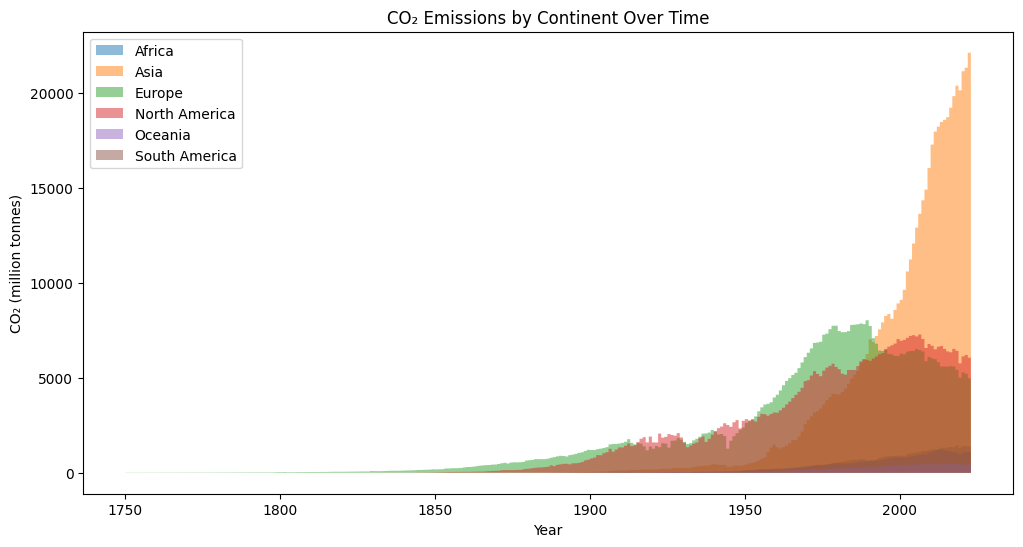

Insight: Asia rises sharply post-2000; Europe trends down modestly.


In [22]:

if "continent" not in countries_df.columns:
    countries_df["continent"] = countries_df["iso_code"].map(iso3_to_continent)

# Group countries into continents (sum CO₂ by continent & year)
regions_df = (
    countries_df.groupby(["year", "continent"])["co2"]
    .sum()
    .reset_index()
)

# Pivot for plotting
pivot = regions_df.pivot(index="year", columns="continent", values="co2").sort_index()

# Drop empty rows
pivot = pivot.dropna(how="all")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for col in pivot.columns:
    plt.fill_between(pivot.index, pivot[col].fillna(0), step="pre", alpha=0.5, label=col)

plt.legend()
plt.title("CO₂ Emissions by Continent Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ (million tonnes)")
plt.show()

print("Insight: Asia rises sharply post-2000; Europe trends down modestly.")


###  Treemap: Top 20 CO₂ Countries by Continent (latest year)

In [23]:

yr = latest_year
treemap_df = countries_df[countries_df["year"]==yr].copy()
treemap_df = treemap_df.dropna(subset=["co2"])
treemap_df = treemap_df.nlargest(20, "co2")
if treemap_df["continent"].notna().any():
    fig = px.treemap(treemap_df, path=["continent","country"], values="co2",
                     color="co2", color_continuous_scale="Reds",
                     title=f"Top 20 Countries CO₂ Emissions (Treemap, {yr})")
    fig.show()
else:
    print("Continent mapping insufficient for treemap.")
print("Insight: Within each continent, a few countries dominate totals.")


Insight: Within each continent, a few countries dominate totals.


###  Violin: CO₂ per Capita by Continent

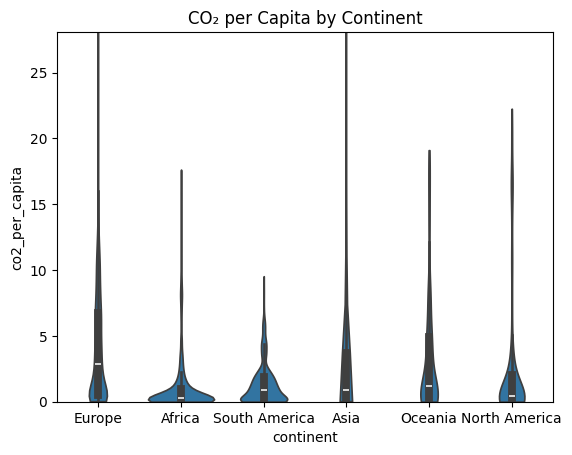

Insight: Wide within-continent variation, especially in Asia and North America.


In [24]:

subset = countries_df.dropna(subset=["continent","co2_per_capita"])
if not subset.empty:
    sns.violinplot(data=subset, x="continent", y="co2_per_capita", cut=0)
    plt.ylim(0, np.nanpercentile(subset["co2_per_capita"], 99))
    plt.title("CO₂ per Capita by Continent")
    plt.show()
else:
    print("Not enough continent mapping to plot.")
print("Insight: Wide within-continent variation, especially in Asia and North America.")


###  Pairplot: Feature Relationships

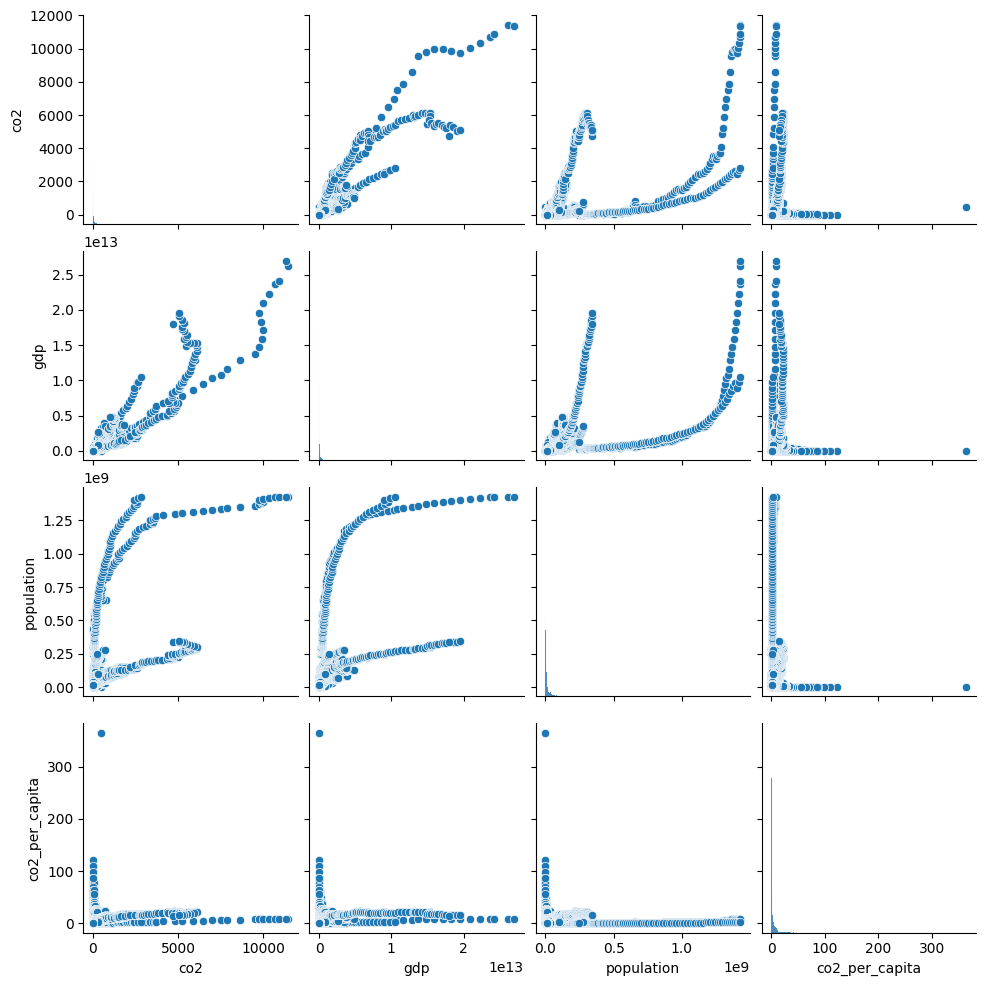

Insight: Confirms GDP/population link to total CO₂; per-capita varies.


In [25]:

cols = ["co2","gdp","population","co2_per_capita"]
avail = [c for c in cols if c in countries_df.columns]
if len(avail) >= 2:
    sns.pairplot(countries_df[avail].dropna())
    plt.show()
else:
    print("Not enough columns for pairplot.")
print("Insight: Confirms GDP/population link to total CO₂; per-capita varies.")


###  Word Cloud: CO₂ by Country (latest year)

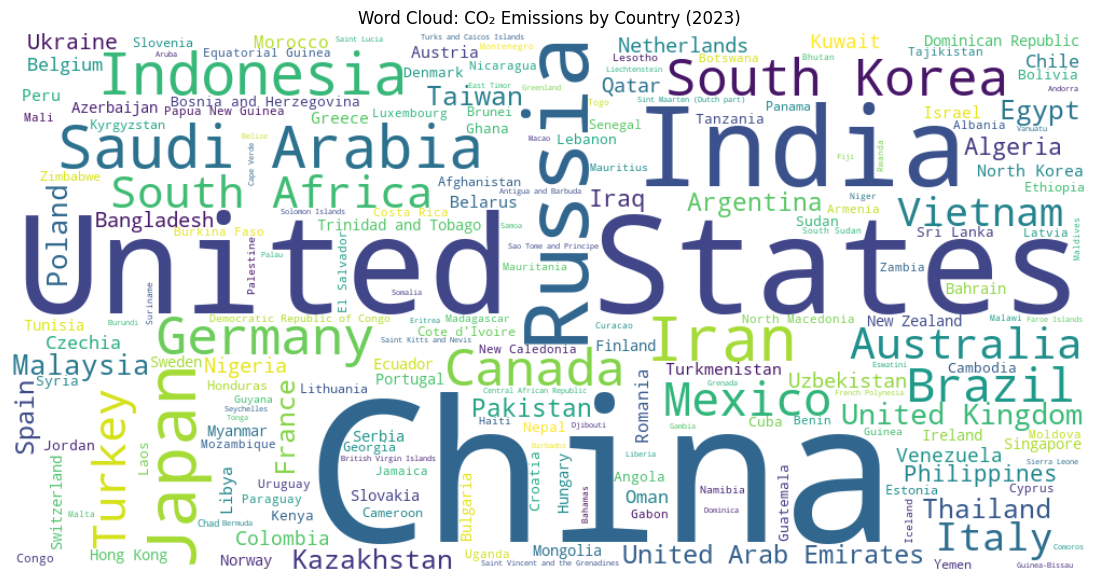

Insight: Larger names = larger emitters.


In [26]:

yr = latest_year
co2_year = countries_df[countries_df["year"]==yr].set_index("country")["co2"].dropna()
if not co2_year.empty:
    wc = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(co2_year)
    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation="bilinear"); plt.axis("off")
    plt.title(f"Word Cloud: CO₂ Emissions by Country ({yr})")
    plt.show()
else:
    print("No CO₂ data found for word cloud.")
print("Insight: Larger names = larger emitters.")


###   Major Emitters Over Time

In [27]:

selected = ["United States","China","India","Russia","Japan","Germany"]
sub = countries_df[countries_df["country"].isin(selected)]
if not sub.empty:
    fig = px.line(sub, x="year", y="co2", color="country",
                  title="CO₂ Emissions Over Time (Major Emitters)")
    fig.update_layout(width=1000, height=600)
    fig.show()
else:
    print("Selected countries not found.")
print("Insight: China surpasses the US after mid-2000s; India steadily rises.")


Insight: China surpasses the US after mid-2000s; India steadily rises.


###  CO₂ Intensity: Emissions per GDP Over Time

In [28]:

if {"co2","gdp"}.issubset(countries_df.columns):
    tmp = countries_df.copy()
    tmp["co2_intensity"] = tmp["co2"] / tmp["gdp"]
    focus = tmp[tmp["country"].isin(["United States","China","India","Germany","Japan","United Kingdom"])].dropna(subset=["co2_intensity"])
    if not focus.empty:
        fig = px.line(focus, x="year", y="co2_intensity", color="country",
                      title="CO₂ Intensity (CO₂ / GDP) — Lower is Better")
        fig.show()
    else:
        print("Insufficient data for intensity lines.")
else:
    print("Missing co2/gdp columns.")
print("Insight: Many advanced economies improve intensity even as GDP grows.")


Insight: Many advanced economies improve intensity even as GDP grows.


###  Cumulative CO₂ Contributions (Historical Responsibility)

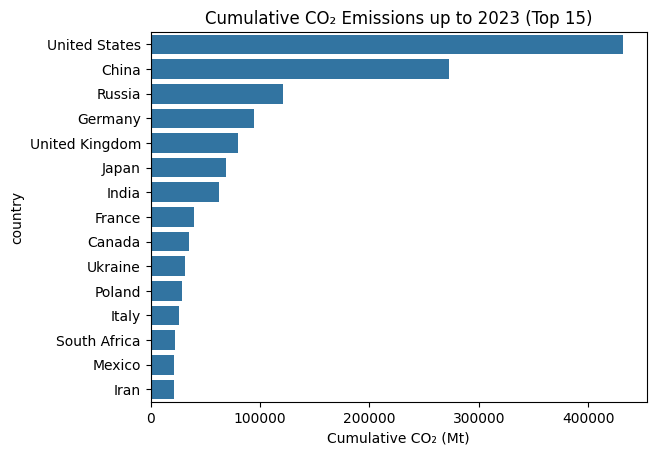

Insight: The US and Europe hold large historical shares even if current growth slows.


In [29]:

if "cumulative_co2" in countries_df.columns:
    yr = latest_year
    cum = countries_df[countries_df["year"]==yr].dropna(subset=["cumulative_co2"])
    top = cum.nlargest(15, "cumulative_co2")
    sns.barplot(data=top, x="cumulative_co2", y="country")
    plt.title(f"Cumulative CO₂ Emissions up to {yr} (Top 15)")
    plt.xlabel("Cumulative CO₂ (Mt)")
    plt.show()
else:
    print("cumulative_co2 not available.")
print("Insight: The US and Europe hold large historical shares even if current growth slows.")


###  Year-on-Year CO₂ Growth (%)

In [30]:

if "co2" in countries_df.columns:
    # Compute YoY % change for selected group
    selected = ["United States","China","India","European Union"]
    sub = df[df[country_col].isin(selected)][[country_col,"year","co2"]].sort_values(["country","year"])
    sub["co2_yoy_prct"] = sub.groupby(country_col)["co2"].pct_change()*100
    fig = px.line(sub, x="year", y="co2_yoy_prct", color=country_col, title="YoY CO₂ Growth (%) — Selected")
    fig.add_hline(y=0)
    fig.show()
else:
    print("co2 not available.")
print("Insight: Shocks (crises, pandemics) show sharp dips; rebounds can be strong.")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8696\1775953612.py:5: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Insight: Shocks (crises, pandemics) show sharp dips; rebounds can be strong.


###  Fuel-Type Breakdown: Coal vs Oil vs Gas (Top Emitters)

In [31]:

needed = {"coal_co2","oil_co2","gas_co2"}
if needed.issubset(countries_df.columns):
    yr = latest_year
    top = countries_df[countries_df["year"]==yr].nlargest(8,"co2")[["country","coal_co2","oil_co2","gas_co2"]].fillna(0)
    melt = top.melt(id_vars="country", var_name="fuel", value_name="co2")
    fig = px.bar(melt, x="country", y="co2", color="fuel", barmode="stack",
                 title=f"Fuel-Type CO₂ Breakdown (Top 8 Emitters, {yr})")
    fig.show()
else:
    print("Missing fuel-specific CO₂ columns.")
print("Insight: Coal dominates in some economies; others rely more on oil/gas.")


Insight: Coal dominates in some economies; others rely more on oil/gas.


###  Inequality: Top 10 Emitters vs Rest (Share)

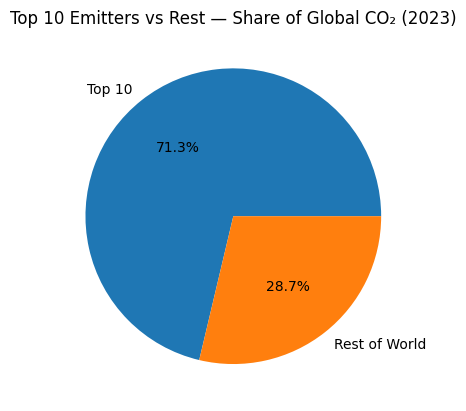

Insight: A small group of countries contributes a majority of emissions.


In [32]:

yr = latest_year
year_df = countries_df[countries_df["year"]==yr].dropna(subset=["co2"])
top10 = year_df.nlargest(10,"co2")["co2"].sum()
rest = year_df["co2"].sum() - top10
plt.figure()
plt.pie([top10, rest], labels=["Top 10","Rest of World"], autopct="%1.1f%%")
plt.title(f"Top 10 Emitters vs Rest — Share of Global CO₂ ({yr})")
plt.show()
print("Insight: A small group of countries contributes a majority of emissions.")


###  Animated Choropleth: Emissions Over Time

In [33]:

if "iso_code" in countries_df.columns:
    sub = countries_df.dropna(subset=["co2"])
    fig = px.choropleth(sub, locations="iso_code", color="co2", hover_name="country",
                        animation_frame="year", color_continuous_scale="Reds",
                        title="Global CO₂ Emissions Over Time (Animated)")
    fig.show()
else:
    print("iso_code not available.")
print("Insight: Industrialization waves shift the emission map over time.")


Insight: Industrialization waves shift the emission map over time.
